# Exploratory Data Analysis

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from scipy.stats import norm, skew
from scipy import stats

## **Reading and Understanding The Provided Data**

In [2]:
amex = pd.read_csv("H:/Kaggle/AmericanExpress/train_data.csv", sep = ',')
print("The DataFrame consists of {} rows and {} features".format(amex.shape[0],amex.shape[1]))

The DataFrame consists of 5531451 rows and 190 features


In [3]:
amex.info(max_cols=190, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 190 columns):
 #    Column       Non-Null Count    Dtype  
---   ------       --------------    -----  
 0    customer_ID  5531451 non-null  object 
 1    S_2          5531451 non-null  object 
 2    P_2          5485466 non-null  float64
 3    D_39         5531451 non-null  float64
 4    B_1          5531451 non-null  float64
 5    B_2          5529435 non-null  float64
 6    R_1          5531451 non-null  float64
 7    S_3          4510907 non-null  float64
 8    D_41         5529435 non-null  float64
 9    B_3          5529435 non-null  float64
 10   D_42         791314 non-null   float64
 11   D_43         3873055 non-null  float64
 12   D_44         5257132 non-null  float64
 13   B_4          5531451 non-null  float64
 14   D_45         5529434 non-null  float64
 15   B_5          5531451 non-null  float64
 16   R_2          5531451 non-null  float64
 17   D_46         4319752 non-

According to the output above, we have 5531451 entries, 0 to 5531450, as well as 190 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 5531451 then there is no missing values for that particular feature. These features are the predictor variables.

We also have a mix of numerical (1 int64 and 184 float64) and object data types.

In [4]:
amex_target = pd.read_csv("H:/Kaggle/AmericanExpress/train_labels.csv", sep = ',')
print("The DataFrame consists of {} rows and {} features".format(amex_target.shape[0],amex_target.shape[1]))

The DataFrame consists of 458913 rows and 2 features


In [5]:
amex_target.info(max_cols=190, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


According to the output above, we have 458913 entries, 0 to 458912, as well as 2 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 458913 then there is no missing values for that particular feature. These features are the target variables.

We also have a mix of numerical 1 int64 and 1 object data types.

In [6]:
total = amex.count()
temp = pd.DataFrame(total)
temp.columns = ['Total']
uniques = []

for col in amex.columns:
    unique = amex[col].nunique()
    uniques.append(unique)
temp['Uniques'] = uniques
print(np.transpose(temp))

         customer_ID      S_2      P_2     D_39      B_1      B_2      R_1  \
Total        5531451  5531451  5485466  5531451  5531451  5529435  5531451   
Uniques       458913      396  5485466  5531451  5531451  5529435  5531450   

             S_3     D_41      B_3  ...   D_136   D_137   D_138    D_139  \
Total    4510907  5529435  5529435  ...  194699  194699  194699  5429903   
Uniques  4510907  5529435  5529435  ...  194699  194699  194699  5429903   

           D_140    D_141   D_142    D_143    D_144    D_145  
Total    5490819  5429903  944408  5429903  5490724  5429903  
Uniques  5490819  5429903  944408  5429903  5490724  5429903  

[2 rows x 190 columns]


In [7]:
total = amex_target.count()
temp = pd.DataFrame(total)
temp.columns = ['Total']
uniques = []

for col in amex_target.columns:
    unique = amex_target[col].nunique()
    uniques.append(unique)
temp['Uniques'] = uniques
print(np.transpose(temp))

         customer_ID  target
Total         458913  458913
Uniques       458913       2


## **Identify and Handle Duplicate Values**

There are 5531451 rows of predictor variables and 458913 rows of target variables.  This indicates duplicate predictor variables.

In [8]:
amex.duplicated(subset='customer_ID', keep=False).sum()

5526331

In [9]:
amex.groupby(amex['customer_ID'].tolist(),as_index=False).size()

,index,size
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,13
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,13
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,13
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,13
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,13
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,13
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,13
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,13


In [10]:
amex = amex.drop_duplicates(subset=['customer_ID'])

In [11]:
print("The DataFrame consists of {} rows and {} features".format(amex.shape[0],amex.shape[1]))

The DataFrame consists of 458913 rows and 190 features


## **Identify and Handle Missing Values**

### **Predictors**

In [12]:
# Count null values
predictor_var = amex.isnull()
predictor_var.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,False
13,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,False
26,False,False,False,False,False,False,False,True,False,False,...,True,True,True,False,False,False,True,False,False,False
39,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,False
52,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.

In [13]:
for column in predictor_var.columns.values.tolist():
    print(column)
    print (predictor_var[column].value_counts())
    print("")

customer_ID
False    458913
Name: customer_ID, dtype: int64

S_2
False    458913
Name: S_2, dtype: int64

P_2
False    441415
True      17498
Name: P_2, dtype: int64

D_39
False    458913
Name: D_39, dtype: int64

B_1
False    458913
Name: B_1, dtype: int64

B_2
False    456897
True       2016
Name: B_2, dtype: int64

R_1
False    458913
Name: R_1, dtype: int64

S_3
False    372973
True      85940
Name: S_3, dtype: int64

D_41
False    456897
True       2016
Name: D_41, dtype: int64

B_3
False    456897
True       2016
Name: B_3, dtype: int64

D_42
True     349624
False    109289
Name: D_42, dtype: int64

D_43
False    283185
True     175728
Name: D_43, dtype: int64

D_44
False    420553
True      38360
Name: D_44, dtype: int64

B_4
False    458913
Name: B_4, dtype: int64

D_45
False    456896
True       2017
Name: D_45, dtype: int64

B_5
False    458913
Name: B_5, dtype: int64

R_2
False    458913
Name: R_2, dtype: int64

D_46
False    308101
True     150812
Name: D_46, dtype: int64



Name: D_127, dtype: int64

D_128
False    409747
True      49166
Name: D_128, dtype: int64

D_129
False    409747
True      49166
Name: D_129, dtype: int64

B_41
False    458912
True          1
Name: B_41, dtype: int64

B_42
True     453411
False      5502
Name: B_42, dtype: int64

D_130
False    409747
True      49166
Name: D_130, dtype: int64

D_131
False    409747
True      49166
Name: D_131, dtype: int64

D_132
True     421615
False     37298
Name: D_132, dtype: int64

D_133
False    428235
True      30678
Name: D_133, dtype: int64

R_28
False    458913
Name: R_28, dtype: int64

D_134
True     446182
False     12731
Name: D_134, dtype: int64

D_135
True     446182
False     12731
Name: D_135, dtype: int64

D_136
True     446182
False     12731
Name: D_136, dtype: int64

D_137
True     446182
False     12731
Name: D_137, dtype: int64

D_138
True     446182
False     12731
Name: D_138, dtype: int64

D_139
False    409747
True      49166
Name: D_139, dtype: int64

D_140
False    42843

Quantitative and Qualitative values must be separated so missing values can be imputed.

In [14]:
# Separate quantitative and qualitative values
quant_amex_vars = amex.columns[amex.dtypes != object]
qual_amex_vars = amex.columns[amex.dtypes == object]

In [15]:
qual_amex_vars = qual_amex_vars[1:]
qual_amex_vars

Index(['S_2', 'D_63', 'D_64'], dtype='object')

In [16]:
quant_imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
for col in quant_amex_vars:
    amex[col] = quant_imputer.fit_transform(amex[col].values.reshape(-1,1))[:,0]

qual_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
for col in qual_amex_vars:
    amex[col] = qual_imputer.fit_transform(amex[col].values.reshape(-1,1))[:,0]

In [17]:
predictor_var = amex.isnull()
for column in predictor_var.columns.values.tolist():
    print(column)
    print (predictor_var[column].value_counts())
    print("")

customer_ID
False    458913
Name: customer_ID, dtype: int64

S_2
False    458913
Name: S_2, dtype: int64

P_2
False    458913
Name: P_2, dtype: int64

D_39
False    458913
Name: D_39, dtype: int64

B_1
False    458913
Name: B_1, dtype: int64

B_2
False    458913
Name: B_2, dtype: int64

R_1
False    458913
Name: R_1, dtype: int64

S_3
False    458913
Name: S_3, dtype: int64

D_41
False    458913
Name: D_41, dtype: int64

B_3
False    458913
Name: B_3, dtype: int64

D_42
False    458913
Name: D_42, dtype: int64

D_43
False    458913
Name: D_43, dtype: int64

D_44
False    458913
Name: D_44, dtype: int64

B_4
False    458913
Name: B_4, dtype: int64

D_45
False    458913
Name: D_45, dtype: int64

B_5
False    458913
Name: B_5, dtype: int64

R_2
False    458913
Name: R_2, dtype: int64

D_46
False    458913
Name: D_46, dtype: int64

D_47
False    458913
Name: D_47, dtype: int64

D_48
False    458913
Name: D_48, dtype: int64

D_49
False    458913
Name: D_49, dtype: int64

B_6
False    458913

### **Target**

In [18]:
# Count null values
target_var = amex_target.isnull()
target_var.head(5)

,customer_ID,target
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.

In [19]:
for column in target_var.columns.values.tolist():
    print(column)
    print (target_var[column].value_counts())
    print("") 

customer_ID
False    458913
Name: customer_ID, dtype: int64

target
False    458913
Name: target, dtype: int64



## **Summary Statistics**

### **Predictors**

In [20]:
# Quantitative Columns
amex[quant_amex_vars].describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,458913.000000,4.589130e+05,458913.000000,458913.000000,4.589130e+05,458913.000000,4.589130e+05,4.589130e+05,458913.000000,458913.000000,...,458913.000000,4.589130e+05,458913.000000,4.589130e+05,4.589130e+05,4.589130e+05,458913.000000,4.589130e+05,4.589130e+05,4.589130e+05
mean,0.659613,1.210624e-01,0.110349,0.659257,5.680385e-02,0.219800,4.472497e-02,1.024816e-01,0.191651,0.147662,...,0.217257,2.131871e-02,0.185561,1.780902e-01,2.406984e-02,1.636294e-01,0.385236,1.779520e-01,5.132359e-02,6.149211e-02
std,0.224138,2.313387e-01,0.197975,0.374936,1.825381e-01,0.157422,1.647107e-01,2.053761e-01,0.119721,0.156819,...,0.033341,2.112578e-02,0.045346,3.574970e-01,1.321985e-01,3.281956e-01,0.090665,3.573865e-01,1.740168e-01,1.802956e-01
min,-0.433779,4.098168e-08,-7.588799,0.000001,2.066058e-08,-0.467030,2.948928e-08,8.087374e-08,-0.000228,0.000001,...,0.000002,1.078787e-08,0.000001,2.454762e-08,5.186710e-09,1.073346e-08,-0.010745,1.010678e-08,1.027419e-07,4.244097e-08
25%,0.495760,3.776924e-03,0.008557,0.224237,2.764615e-03,0.140971,2.797956e-03,4.586087e-03,0.191651,0.066255,...,0.217257,2.131871e-02,0.185561,3.386186e-03,2.729722e-03,3.381395e-03,0.385236,3.385661e-03,2.944836e-03,3.379511e-03
50%,0.666863,7.529619e-03,0.027948,0.814825,5.530282e-03,0.177842,5.601450e-03,8.688864e-03,0.191651,0.147662,...,0.217257,2.131871e-02,0.185561,6.786676e-03,5.441162e-03,6.784914e-03,0.385236,6.766139e-03,5.889009e-03,6.767604e-03
75%,0.853022,1.516591e-01,0.108398,1.001683,8.293095e-03,0.219800,8.403133e-03,8.721459e-02,0.191651,0.147662,...,0.217257,2.131871e-02,0.185561,1.780902e-01,8.180422e-03,1.636294e-01,0.385236,1.779520e-01,8.849203e-03,6.149211e-02
max,1.010000,5.389326e+00,1.324059,1.010000,2.753790e+00,3.246689,7.505471e+00,1.490495e+00,4.189044,8.538821,...,1.759600,1.009998e+00,2.500704,1.010000e+00,1.009999e+00,1.324859e+00,2.182950,1.010000e+00,1.343316e+00,4.737025e+00


In [21]:
# Qualitative Columns
amex[qual_amex_vars].describe()

,S_2,D_63,D_64
count,458913,458913,458913
unique,396,6,4
top,2017-03-25,CO,O
freq,19142,345228,287788


### **Target**

In [22]:
amex_target.describe()

,target
count,458913.000000
mean,0.258934
std,0.438050
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


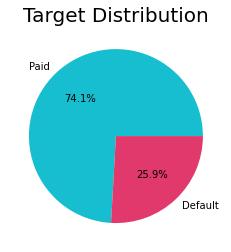

<Figure size 33.12x68.4 with 0 Axes>

In [23]:
target=amex_target.target.value_counts(normalize=True)
target.rename(index={1:'Default',0:'Paid'},inplace=True)
colors = ['#17becf', '#E1396C']
data = plt.pie(target,
                labels= target.index,
                colors=colors,
                autopct='%1.1f%%'
                )
layout = plt.title("Target Distribution",fontdict = {'fontsize' : 20})
fig = plt.figure(figsize = (0.46,0.95))

## **Correlations**

In [24]:
amex_correlations = [ ]
top_features = [ ]
count = 0
for col in quant_amex_vars:
    pearson_coef, p_value = stats.pearsonr(amex[col], amex_target['target'])
    amex_correlations.append(pearson_coef)
    if np.abs(pearson_coef) > 0.3:
        top_features.append(col)
        print(top_features[count],'\t' ,pearson_coef)
        count += 1

P_2 	 -0.5383460929670209
B_2 	 -0.3499531190167962
D_44 	 0.3688854031045568
D_48 	 0.44135684371654105
B_7 	 0.32918778770596324
B_8 	 0.3289528655718974
B_9 	 0.36707995935505033
D_55 	 0.30088262700552554
D_58 	 0.34655415066371775
D_62 	 -0.311696787781331
B_18 	 -0.3589865014912577
B_23 	 0.32130409336143867
D_74 	 0.3455805123736984
D_75 	 0.36783882687714675


C:\Users\radix\anaconda3\envs\PyTorch\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


B_33 	 -0.30401288549019234


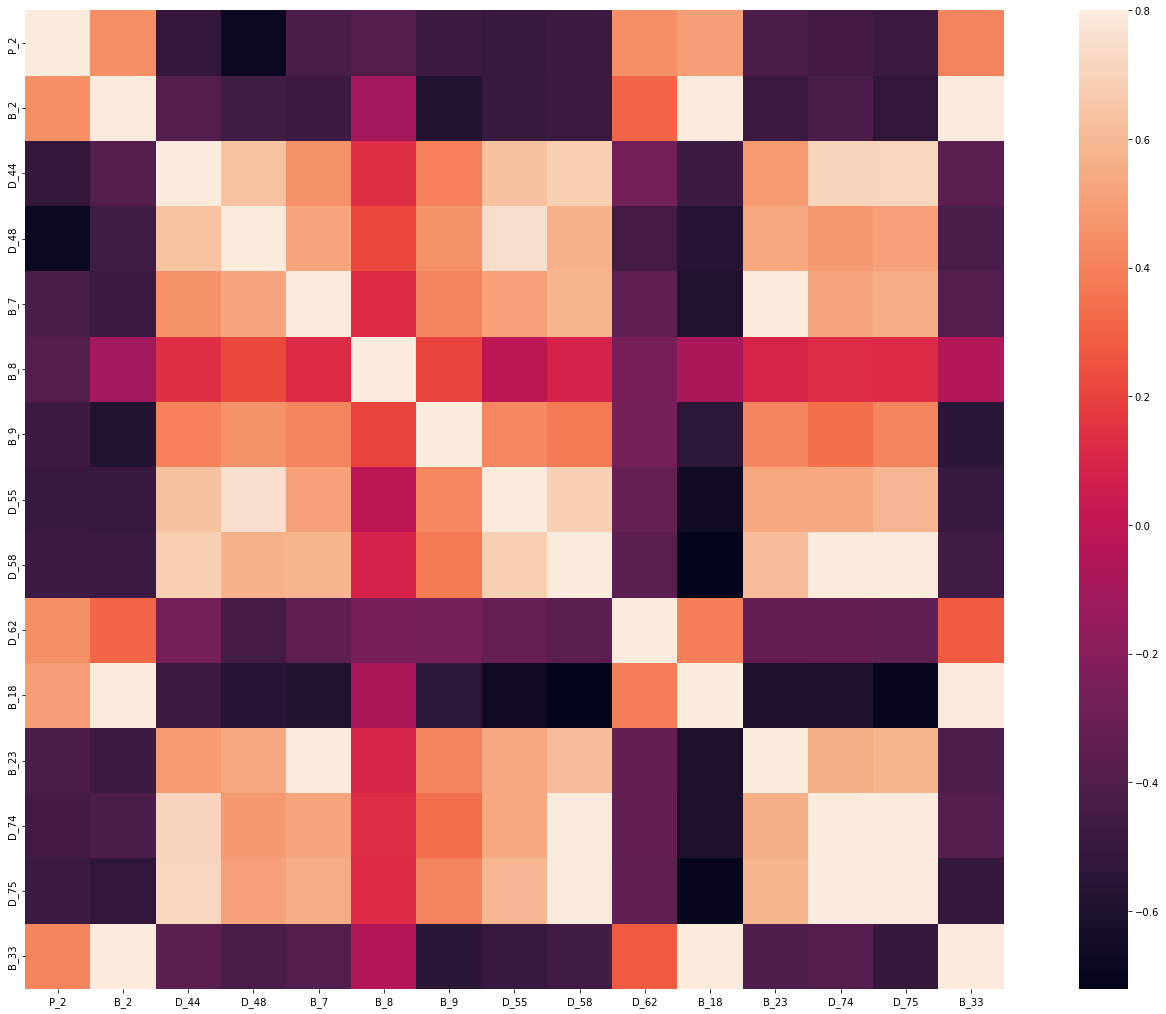

In [26]:
# Correlation Matrix
correlation_matrix = amex[top_features].corr()
fig = plt.figure(figsize = (27,18))
sns.heatmap(correlation_matrix, vmax = .8, square = True)
plt.show()

## **Skew**

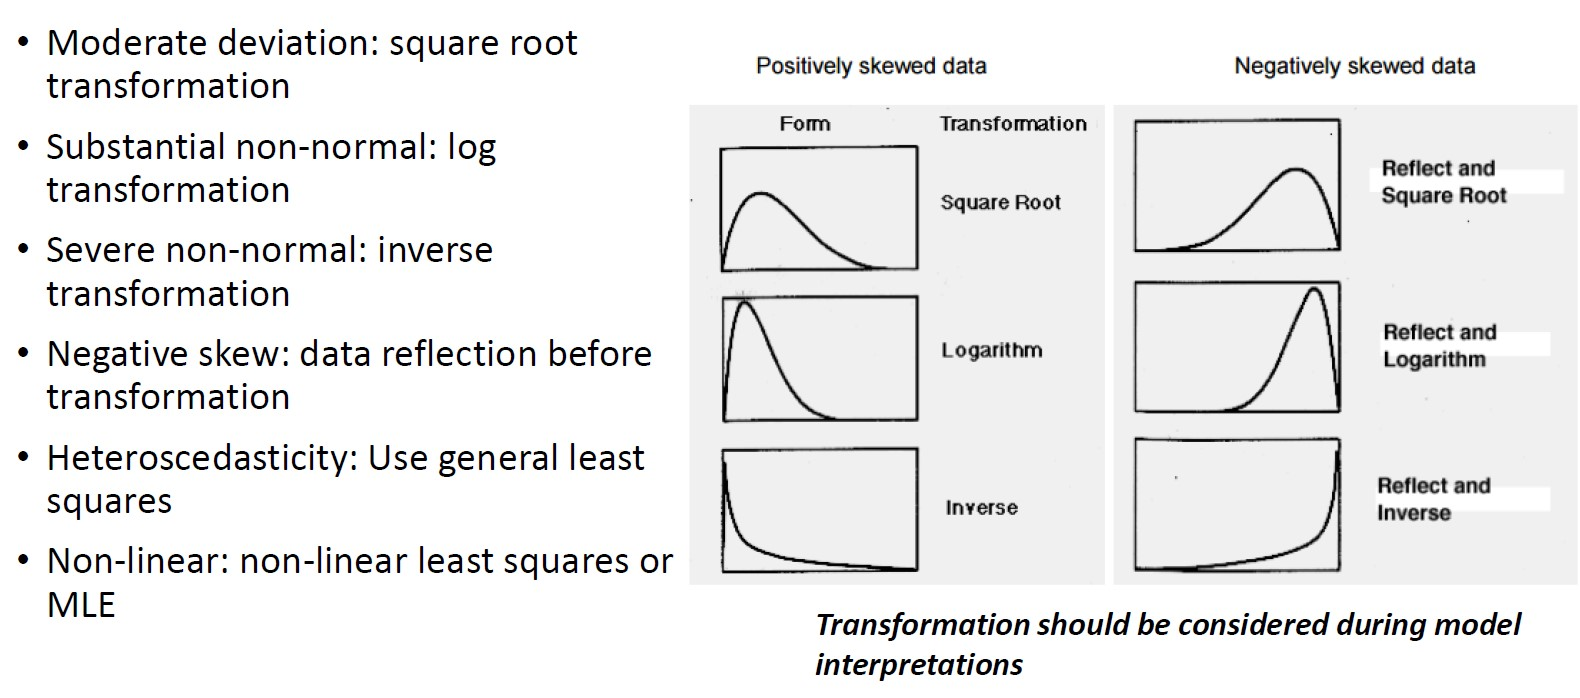

In [29]:
# Histograms of each variable : 0.2 random sample of rows selected
# ---------------------------------------------------------------------
# random_state helps assure that you always get the same output when you split the data
# this helps create reproducible results and it does not actually matter what the number is
# frac is percentage of the data that will be returned
data_part = amex.sample(frac=0.6,random_state=42)
print(data_part.shape)

(275348, 190)


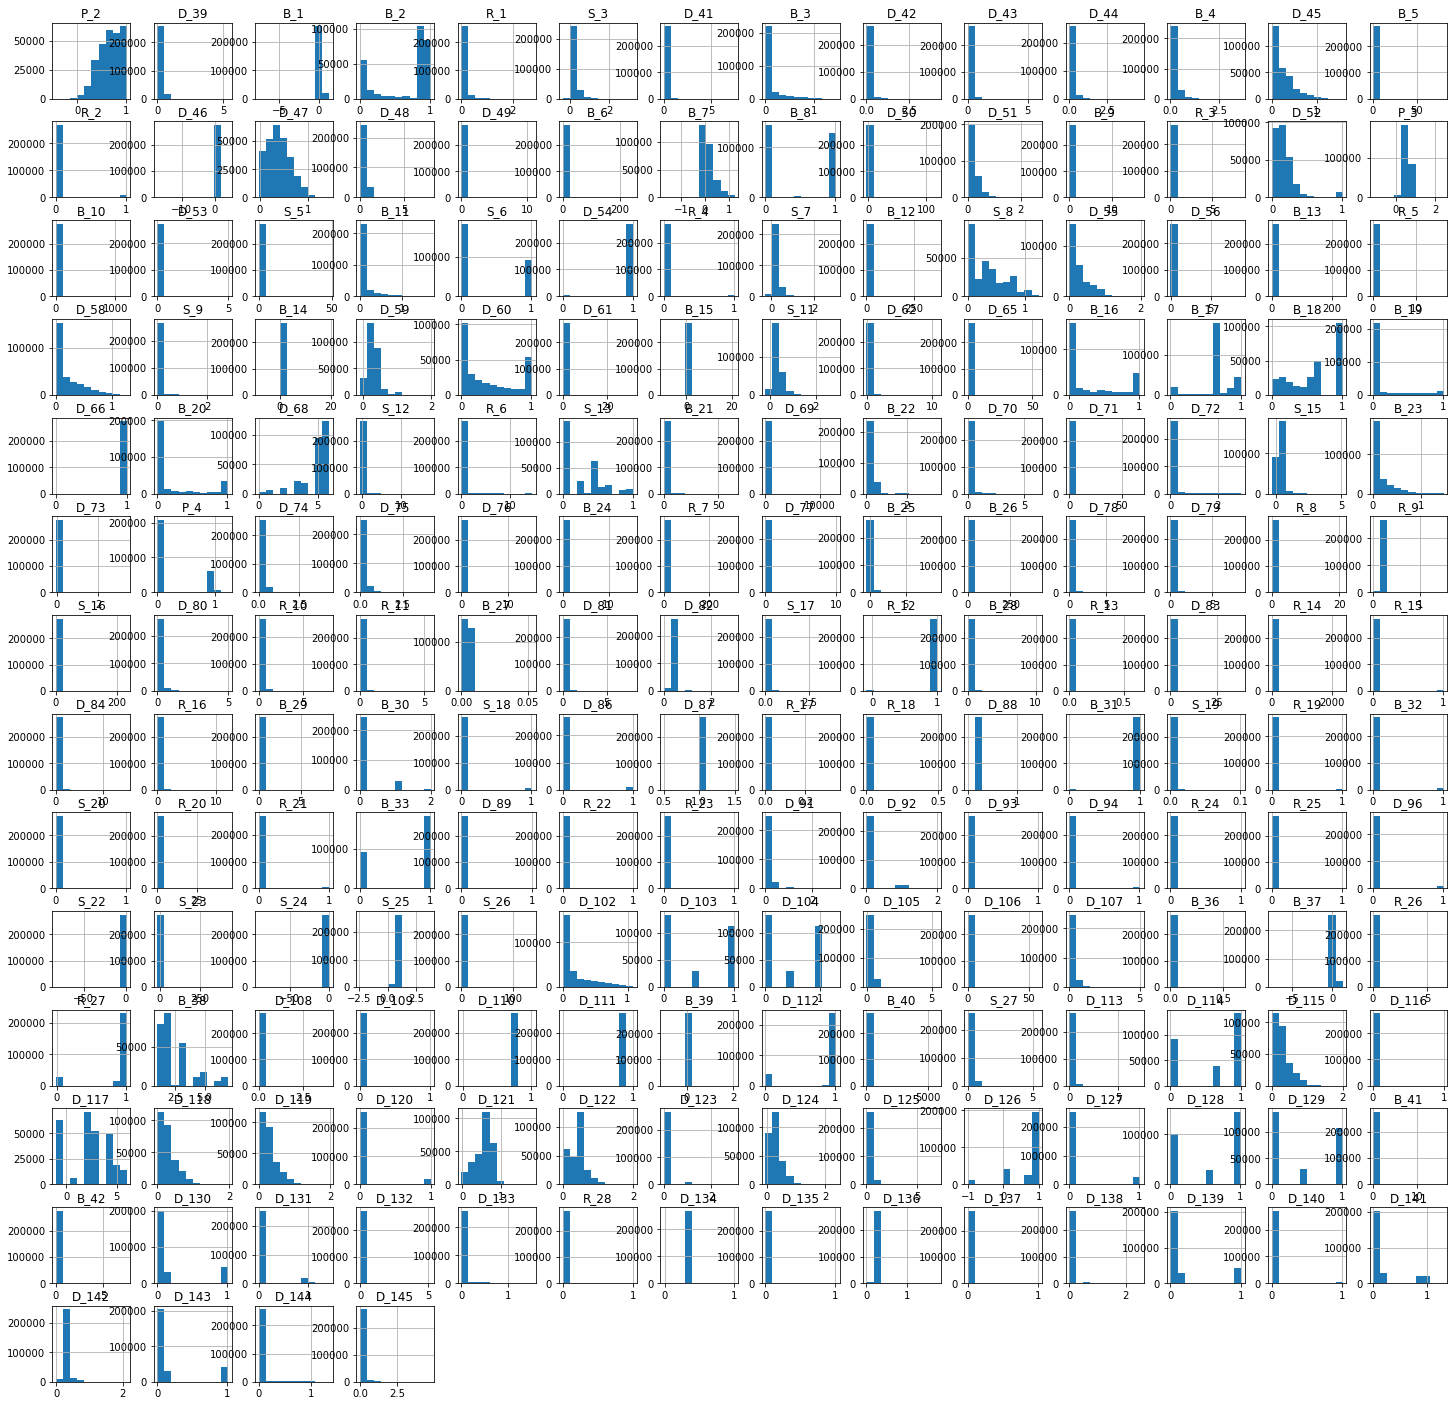

In [30]:
# plot the histogram of each parameter
data_part.hist(figsize=(25,25))
plt.show()

<br/>
<br/>
<br/>
The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. 

In [31]:
for col in (quant_amex_vars):    
    if   amex[col].skew() > 10 or amex[col].skew() < -10:
        print("Skewness before transformatin: {}: After transformation: {} for ".format(amex[col].skew(), np.reciprocal(np.abs(amex[col].skew()))),col)
        amex[col] = 1/(np.abs(amex[col]))
        
    elif (amex[col].skew() < 10 and amex[col].skew() > 5) or (amex[col].skew() > -10 and amex[col].skew() < -5): 
        print("Skewness before transformatin: {}: After transformation: {} for ".format(amex[col].skew(), np.log10(np.abs(amex[col].skew()))),col)
        amex[col] = np.log10(np.abs(amex[col]))
        
    elif (amex[col].skew() < 5 and amex[col].skew() > 1) or (amex[col].skew() > -5 and amex[col].skew() < -1): 
        print("Skewness before transformatin: {}: After transformation: {} for ".format(amex[col].skew(), np.log(np.abs(amex[col].skew()))),col)
        amex[col] = np.log(np.abs(amex[col]))
        
    elif (amex[col].skew() < 1 and amex[col].skew() > 0.5) or (amex[col].skew() > -1 and amex[col].skew() < -0.5):
        print("Skewness before transformatin: {}: After transformation: {} for ".format(amex[col].skew(), np.sqrt(np.abs(amex[col].skew()))),col)
        amex[col] = np.sqrt(np.abs(amex[col]))
        
    else:
        print("Skewness before transformatin: {}: After transformation: {} for ".format(amex[col].skew(), amex[col].skew()),col)

Skewness before transformatin: -0.4855916065737827: After transformation: -0.4855916065737827 for  P_2
Skewness before transformatin: 3.7608581391224543: After transformation: 1.3246471598516578 for  D_39
Skewness before transformatin: 2.851199961205727: After transformation: 1.0477399446880564 for  B_1
Skewness before transformatin: -0.805286874376723: After transformation: 0.897377776845807 for  B_2
Skewness before transformatin: 4.4503321802485685: After transformation: 1.4929787406390511 for  R_1
Skewness before transformatin: 3.372361984477731: After transformation: 1.2156133844603652 for  S_3
Skewness before transformatin: 8.26286551949821: After transformation: 0.9171306845469416 for  D_41
Skewness before transformatin: 2.6774993193727386: After transformation: 0.9848832691372091 for  B_3
Skewness before transformatin: 9.110479712185962: After transformation: 0.9595412453451382 for  D_42
Skewness before transformatin: 6.7430018352125645: After transformation: 0.8288532778766373 

C:\Users\radix\anaconda3\envs\PyTorch\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skewness before transformatin: 0.8582658049017443: After transformation: 0.92642636237412 for  S_13
Skewness before transformatin: 37.35472850069919: After transformation: 0.026770372591017024 for  B_21
Skewness before transformatin: 539.7830763202446: After transformation: 0.001852596059174549 for  D_69
Skewness before transformatin: 2.657369352980039: After transformation: 0.9773366683999204 for  B_22
Skewness before transformatin: 3.729462221066484: After transformation: 1.3162640466034916 for  D_70
Skewness before transformatin: 49.71720934326738: After transformation: 0.02011375966610681 for  D_71
Skewness before transformatin: 11.224577977159298: After transformation: 0.08909020918513667 for  D_72
Skewness before transformatin: 1.5577049735489559: After transformation: 0.44321356722518457 for  S_15
Skewness before transformatin: 2.09397076668348: After transformation: 0.7390621518367988 for  B_23
Skewness before transformatin: 49.01085865385721: After transformation: 0.0204036417

Skewness before transformatin: 97.8495746249082: After transformation: 0.010219768494991944 for  D_108
Skewness before transformatin: 23.88122988057996: After transformation: 0.04187389028959487 for  D_109
Skewness before transformatin: -16.50704783029511: After transformation: 0.060580184311619704 for  D_110
Skewness before transformatin: -38.284831518509584: After transformation: 0.026120005243239208 for  D_111
Skewness before transformatin: 75.61440127961161: After transformation: 0.01322499395719789 for  B_39
Skewness before transformatin: -2.117330125217456: After transformation: 0.7501559201074989 for  D_112
Skewness before transformatin: 437.9268658466881: After transformation: 0.002283486303281712 for  B_40
Skewness before transformatin: 7.541784591555888: After transformation: 0.8774741239281776 for  S_27
Skewness before transformatin: 2.1491912854899455: After transformation: 0.765091625095067 for  D_113
Skewness before transformatin: -0.4670454366989229: After transformation

## **Feature Exploration**

In [32]:
# Determine the number of Paid v Default cases
default = amex_target[amex_target['target'] == 1]
paid = amex_target[amex_target['target'] == 0] 

outlier_fraction = len(default) / float(len(paid))

print('Outlier_Fraction: {}'.format(outlier_fraction))
print('Default Cases: {}'.format(len(default)))
print('Paid Cases: {}'.format(len(paid)))

Outlier_Fraction: 0.3494067659555699
Default Cases: 118828
Paid Cases: 340085
